In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
leaderboard = pd.read_csv("leaderboard_dataset.csv")
test = pd.read_csv("test.csv")
train = train.fillna(0)
leaderboard = leaderboard.fillna(0)
test = test.fillna(0)

In [3]:
y = train["VAR21"]
X = train.drop(["VAR21"], axis=1)

In [4]:
from sklearn.preprocessing import LabelEncoder

for c in X.columns:
    if X[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(X[c].values) + list(test[c].values) + list(leaderboard[c].values)) 
        X[c] = lbl.transform(list(X[c].values))
        test[c] = lbl.transform(list(test[c].values))
        leaderboard[c] = lbl.transform(list(leaderboard[c].values))

In [5]:
lbl = LabelEncoder() 
lbl.fit(list(y.values)) 
y = lbl.transform(list(y))

In [6]:
X["Target"] = y
# High
X["Target"][X["Target"] == 0] = 3
# Low
X["Target"][X["Target"] == 1] = 0
# Medium
X["Target"][X["Target"] == 2] = 1
# High
X["Target"][X["Target"] == 3] = 2

/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/vrishank/anac

In [67]:
from copy import deepcopy

X["Target"] = y
X1 = deepcopy(X)
X2 = deepcopy(X)
# High
X1["Target"][X1["Target"] == 0] = 3
# Low
X1["Target"][X1["Target"] == 1] = 0
# Medium
X1["Target"][X1["Target"] == 2] = 1
# High
X1["Target"][X1["Target"] == 3] = 2

X1 = X1[X1["Target"]!=0]

X1["Target"][X1["Target"] == 1] = 0
X1["Target"][X1["Target"] == 2] = 1


# High
X2["Target"][X2["Target"] == 0] = 3
# Low
X2["Target"][X2["Target"] == 1] = 0
# Medium
X2["Target"][X2["Target"] == 2] = 1
# High
X2["Target"][X2["Target"] == 3] = 2

X2 = X2[X2["Target"]!=2]

X2["Target"][X2["Target"] == 0] = 0
X2["Target"][X2["Target"] == 1] = 1

/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/vrishank/anac

In [48]:
print(X1["Target"].value_counts())
print(X2["Target"].value_counts())
print(X1["Target"].shape)
print(X2["Target"].shape)

xgb_params = {
    'n_trees': 700, 
    'eta': 0.01,
    'max_depth': 5,
    'subsample': 0.93,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': 1,
}

dtrain1 = xgb.DMatrix(X1.drop(["Target"], axis=1), X1["Target"])
dtrain2 = xgb.DMatrix(X2.drop(["Target"], axis=1), X2["Target"])
dtrain3 = xgb.DMatrix(X.drop(["Target"], axis=1), X["Target"])

dtest = xgb.DMatrix(leaderboard)
cv_result = xgb.cv(xgb_params, 
                   dtrain1, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50
                  )
num_boost_rounds = len(cv_result)
print('num_boost_rounds=' + str(num_boost_rounds))

cv_result = xgb.cv(xgb_params, 
                   dtrain2, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50
                  )
num_boost_rounds = len(cv_result)
print('num_boost_rounds=' + str(num_boost_rounds))

0    30253
1     3747
Name: Target, dtype: int64
1    21919
0    12081
Name: Target, dtype: int64
(34000,)
(34000,)
[0]	train-error:0.105824+0.00135523	test-error:0.111529+0.00278202
[50]	train-error:0.104353+0.00160044	test-error:0.109441+0.00307009
[100]	train-error:0.104132+0.00191566	test-error:0.109412+0.00318923
[150]	train-error:0.104162+0.00193535	test-error:0.109383+0.00322068
[200]	train-error:0.104309+0.00183152	test-error:0.109177+0.00362709
[250]	train-error:0.104074+0.00187858	test-error:0.109088+0.00372337
[300]	train-error:0.103647+0.00182814	test-error:0.109059+0.00384747
[350]	train-error:0.103132+0.00177806	test-error:0.109177+0.00384023
[400]	train-error:0.102706+0.0018443	test-error:0.109118+0.00385507
[450]	train-error:0.102147+0.00172904	test-error:0.109147+0.0036826
[500]	train-error:0.101794+0.00172788	test-error:0.109+0.00386309
[550]	train-error:0.101294+0.00173825	test-error:0.109029+0.0039732
[600]	train-error:0.100809+0.00178485	test-error:0.108941+0.00395

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [59]:
lasso = RandomForestClassifier(n_estimators=50)

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))

[[30159    94]
 [ 3658    89]]
[[ 5276  6805]
 [ 8008 13911]]


In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

import numpy as np
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

0    18172
1     3747
Name: Target, dtype: int64 [18172 18172]
[[15249  2923]
 [ 2997   750]]
              precision    recall  f1-score   support

         Not       0.84      0.84      0.84     18172
        High       0.20      0.20      0.20      3747

    accuracy                           0.73     21919
   macro avg       0.52      0.52      0.52     21919
weighted avg       0.73      0.73      0.73     21919

[[  598 17574]
 [ 2901 15271]]
              precision    recall  f1-score   support

         Not       0.17      0.03      0.06     18172
        High       0.46      0.84      0.60     18172

    accuracy                           0.44     36344
   macro avg       0.32      0.44      0.33     36344
weighted avg       0.32      0.44      0.33     36344

1    18172
0    12081
Name: Target, dtype: int64 [18172 18172]
[[ 5673  6408]
 [ 7021 11151]]
              precision    recall  f1-score   support

         Not       0.45      0.47      0.46     12081
         Low      

In [70]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report

import numpy as np
sm = BorderlineSMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

0    18172
1     3747
Name: Target, dtype: int64 [18172 18172]
[[16344  1828]
 [ 3174   573]]
              precision    recall  f1-score   support

         Not       0.84      0.90      0.87     18172
        High       0.24      0.15      0.19      3747

    accuracy                           0.77     21919
   macro avg       0.54      0.53      0.53     21919
weighted avg       0.74      0.77      0.75     21919

[[  639 17533]
 [ 2907 15265]]
              precision    recall  f1-score   support

         Not       0.18      0.04      0.06     18172
        High       0.47      0.84      0.60     18172

    accuracy                           0.44     36344
   macro avg       0.32      0.44      0.33     36344
weighted avg       0.32      0.44      0.33     36344

1    18172
0    12081
Name: Target, dtype: int64 [18172 18172]
[[ 5799  6282]
 [ 6900 11272]]
              precision    recall  f1-score   support

         Not       0.46      0.48      0.47     12081
         Low      

In [72]:
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report

import numpy as np
sm = ADASYN(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

0    18172
1     3747
Name: Target, dtype: int64 [18172 19347]
[[15372  2800]
 [ 2988   759]]
              precision    recall  f1-score   support

         Not       0.84      0.85      0.84     18172
        High       0.21      0.20      0.21      3747

    accuracy                           0.74     21919
   macro avg       0.53      0.52      0.52     21919
weighted avg       0.73      0.74      0.73     21919

[[  607 17565]
 [ 2812 16535]]
              precision    recall  f1-score   support

         Not       0.18      0.03      0.06     18172
        High       0.48      0.85      0.62     19347

    accuracy                           0.46     37519
   macro avg       0.33      0.44      0.34     37519
weighted avg       0.34      0.46      0.35     37519

1    18172
0    12081
Name: Target, dtype: int64 [20031 18172]
[[ 5796  6285]
 [ 7150 11022]]
              precision    recall  f1-score   support

         Not       0.45      0.48      0.46     12081
         Low      

In [73]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.metrics import classification_report

import numpy as np
sm = KMeansSMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

RuntimeError: No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.

In [74]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

import numpy as np
sm = RandomOverSampler(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

0    18172
1     3747
Name: Target, dtype: int64 [18172 18172]
[[15323  2849]
 [ 3033   714]]
              precision    recall  f1-score   support

         Not       0.83      0.84      0.84     18172
        High       0.20      0.19      0.20      3747

    accuracy                           0.73     21919
   macro avg       0.52      0.52      0.52     21919
weighted avg       0.73      0.73      0.73     21919

[[  174 17998]
 [  172 18000]]
              precision    recall  f1-score   support

         Not       0.50      0.01      0.02     18172
        High       0.50      0.99      0.66     18172

    accuracy                           0.50     36344
   macro avg       0.50      0.50      0.34     36344
weighted avg       0.50      0.50      0.34     36344

1    18172
0    12081
Name: Target, dtype: int64 [18172 18172]
[[ 5806  6275]
 [ 6822 11350]]
              precision    recall  f1-score   support

         Not       0.46      0.48      0.47     12081
         Low      

In [77]:
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report

import numpy as np
sm = SMOTENC(random_state=12, categorical_features=None)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

TypeError: iteration over a 0-d array

In [78]:
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import classification_report

import numpy as np
sm = SVMSMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X1.drop(["Target"], axis=1), X1["Target"])
print (X1["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "High"]))

x_train_res, y_train_res = sm.fit_sample(X2.drop(["Target"], axis=1), X2["Target"])
print (X2["Target"].value_counts() , np.bincount(y_train_res))

y_pred = cross_val_predict(lasso, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

y_pred = cross_val_predict(lasso, x_train_res, y_train_res, cv=3)
print(confusion_matrix(y_train_res, y_pred))
print(classification_report(y_train_res, y_pred, target_names=["Not", "Low"]))

0    18172
1     3747
Name: Target, dtype: int64 [18172 18172]
[[14956  3216]
 [ 2950   797]]
              precision    recall  f1-score   support

         Not       0.84      0.82      0.83     18172
        High       0.20      0.21      0.21      3747

    accuracy                           0.72     21919
   macro avg       0.52      0.52      0.52     21919
weighted avg       0.73      0.72      0.72     21919

[[   11 18161]
 [ 5185 12987]]
              precision    recall  f1-score   support

         Not       0.00      0.00      0.00     18172
        High       0.42      0.71      0.53     18172

    accuracy                           0.36     36344
   macro avg       0.21      0.36      0.26     36344
weighted avg       0.21      0.36      0.26     36344

1    18172
0    12081
Name: Target, dtype: int64 [18172 18172]
[[ 5868  6213]
 [ 6943 11229]]
              precision    recall  f1-score   support

         Not       0.46      0.49      0.47     12081
         Low      

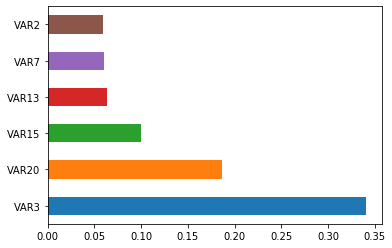

In [17]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X.drop(["Target"], axis=1), X["Target"])
clf.feature_importances_

(pd.Series(clf.feature_importances_, index=X.drop(["Target"], axis=1).columns)
   .nlargest(6)
   .plot(kind='barh'))

In [84]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)

print(cross_val_score(clf, X1.drop(["Target"], axis=1), X1["Target"], cv=3))

y_pred = cross_val_predict(clf, X1.drop(["Target"], axis=1), X1["Target"], cv=3)
print(confusion_matrix(X1["Target"], y_pred))
print(classification_report(X1["Target"], y_pred, target_names=["Not", "High"]))

y_pred = cross_val_predict(clf, X2.drop(["Target"], axis=1), X2["Target"], cv=3)
print(confusion_matrix(X2["Target"], y_pred))
print(classification_report(X2["Target"], y_pred, target_names=["Not", "Low"]))

/Users/vrishank/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: __init__() got an unexpected keyword argument 'prefer'

In [27]:
# High
X["Target"][X["Target"] == 0] = 3
# Low
X["Target"][X["Target"] == 1] = 0
# Medium
X["Target"][X["Target"] == 2] = 1
# High
X["Target"][X["Target"] == 3] = 2

/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py

In [89]:
from sklearn.model_selection import train_test_split
X1, X_val, y1, y_val = train_test_split(X, y,
                                                    train_size=30000, test_size=4000)

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [98]:
X1["Target"] = y1
stack = X1[["Target"]]
stack["1"]=0
stack["2"]=0
stack["3"]=0
stack["4"]=0
stack["5"]=0
stack["6"]=0
stack["7"]=0
stack["8"]=0
stack["9"]=0
X1 = X1.drop(["Target"], axis=1)

/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [109]:
xgb_params = {
    'n_trees': 700, 
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.93,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'silent': 1,
    'num_class' :2
}
xgb_params3 = {
    'n_trees': 700, 
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.93,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'silent': 1,
    'num_class' :3
}

stack1=[]
stack2=[]
stack3=[]
stack4=[]
stack5=[]
stack6=[]
stack7=[]
stack8=[]
stack9=[]


for train_index, test_index in kf.split(X1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    
    X_train["Target"] = y_train
    # High
    X_train["Target"][X_train["Target"] == 0] = 3
    # Low
    X_train["Target"][X_train["Target"] == 1] = 0
    # Medium
    X_train["Target"][X_train["Target"] == 2] = 1
    # High
    X_train["Target"][X_train["Target"] == 3] = 2

    X_MH = X_train[X_train["Target"]!=0]
    X_MH["Target"][X_MH["Target"]==1] = 0
    X_MH["Target"][X_MH["Target"]==2] = 1
    y_MH = X_MH["Target"]
    X_LH = X_train[X_train["Target"]!=1]
    X_LH["Target"][X_LH["Target"]==0] = 0
    X_LH["Target"][X_LH["Target"]==2] = 1
    y_LH = X_LH["Target"]
    X_LM = X_train[X_train["Target"]!=2]
    X_LM["Target"][X_LM["Target"]==0] = 0
    X_LM["Target"][X_LM["Target"]==1] = 1
    y_LM = X_LM["Target"]
    
    dtrain = xgb.DMatrix(X_train.drop(["Target"], axis=1), y_train)
    dtrain_MH = xgb.DMatrix(X_MH.drop(["Target"], axis=1), y_MH)
    dtrain_LH = xgb.DMatrix(X_LH.drop(["Target"], axis=1), y_LH)
    dtrain_LM = xgb.DMatrix(X_LM.drop(["Target"], axis=1), y_LM)
    
    dtest = xgb.DMatrix(X_test)
    cv_result3 = xgb.cv(xgb_params, 
                       dtrain_LH, 
                       num_boost_round=1200, # increase to have better results (~700)
                       verbose_eval=50,
                       early_stopping_rounds=50
                      )
    num_boost_rounds = len(cv_result3)
    print('num_boost_rounds=' + str(num_boost_rounds))
    # train model
    model3 = xgb.train(dict(xgb_params, silent=1), dtrain_LH, num_boost_round=num_boost_rounds)
    # make predictions and save results
    y_preds3 = model3.predict(dtest)
    print(y_preds3.shape)
    stack6.append(y_preds3[:,0])
    stack7.append(y_preds3[:,1])
    
    
    
    cv_result1 = xgb.cv(xgb_params3, 
                   dtrain, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                      )
    num_boost_rounds = len(cv_result1)
    print('num_boost_rounds=' + str(num_boost_rounds))
    # train model
    model1 = xgb.train(dict(xgb_params3, silent=1), dtrain, num_boost_round=num_boost_rounds)
    # make predictions and save results
    y_preds1 = model1.predict(dtest)
    print(y_preds1.shape)
    stack1.append(y_preds1[:,0])
    stack2.append(y_preds1[:,1])
    stack3.append(y_preds1[:,2])
    
    
    
    cv_result2 = xgb.cv(xgb_params, 
                       dtrain_MH, 
                       num_boost_round=1200, # increase to have better results (~700)
                       verbose_eval=50,
                       early_stopping_rounds=50
                      )
    num_boost_rounds = len(cv_result2)
    print('num_boost_rounds=' + str(num_boost_rounds))
    # train model
    model2 = xgb.train(dict(xgb_params, silent=1), dtrain_MH, num_boost_round=num_boost_rounds)
    # make predictions and save results
    y_preds2 = model2.predict(dtest)
    print(y_preds2.shape)
    stack4.append(y_preds2[:,0])
    stack5.append(y_preds2[:,1])
    
    
    cv_result3 = xgb.cv(xgb_params, 
                       dtrain_LH, 
                       num_boost_round=1200, # increase to have better results (~700)
                       verbose_eval=50,
                       early_stopping_rounds=50
                      )
    num_boost_rounds = len(cv_result3)
    print('num_boost_rounds=' + str(num_boost_rounds))
    # train model
    model3 = xgb.train(dict(xgb_params, silent=1), dtrain_LH, num_boost_round=num_boost_rounds)
    # make predictions and save results
    y_preds3 = model3.predict(dtest)
    print(y_preds3.shape)
    stack6.append(y_preds3[:,0])
    stack7.append(y_preds3[:,1])
    
    
    
    cv_result4 = xgb.cv(xgb_params, 
                       dtrain_LM, 
                       num_boost_round=1200, # increase to have better results (~700)
                       verbose_eval=50,
                       early_stopping_rounds=50
                      )
    num_boost_rounds = len(cv_result4)
    print('num_boost_rounds=' + str(num_boost_rounds))
    # train model
    model4 = xgb.train(dict(xgb_params, silent=1), dtrain_LM, num_boost_round=num_boost_rounds)
    # make 4predictions and save results
    y_preds4 = model4.predict(dtest)
    stack8.append(y_preds4[:,0])
    stack9.append(y_preds4[:,1])

TRAIN: [10000 10001 10002 ... 29997 29998 29999] TEST: [   0    1    2 ... 9997 9998 9999]


/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vrishank/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/vrishank/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/vrishank/anaconda3

[0]	train-mlogloss:1.09535+2.90096e-05	test-mlogloss:1.09575+3.47595e-05
[50]	train-mlogloss:0.975464+0.000969809	test-mlogloss:0.993868+0.000994213
[100]	train-mlogloss:0.906077+0.0011013	test-mlogloss:0.940519+0.00152211
[150]	train-mlogloss:0.861888+0.00125392	test-mlogloss:0.911004+0.00212437
[200]	train-mlogloss:0.830706+0.00145641	test-mlogloss:0.893812+0.00272792
[250]	train-mlogloss:0.807326+0.00147652	test-mlogloss:0.883595+0.00313695
[300]	train-mlogloss:0.78906+0.00151157	test-mlogloss:0.87758+0.00328482
[350]	train-mlogloss:0.774032+0.00109544	test-mlogloss:0.873907+0.00341195
[400]	train-mlogloss:0.761203+0.00107264	test-mlogloss:0.871644+0.00337422
[450]	train-mlogloss:0.749612+0.000958349	test-mlogloss:0.870303+0.00334533
[500]	train-mlogloss:0.738799+0.00114937	test-mlogloss:0.86958+0.00332968
[550]	train-mlogloss:0.728893+0.00124263	test-mlogloss:0.869098+0.00333223
[600]	train-mlogloss:0.719588+0.00196493	test-mlogloss:0.868818+0.0032915
[650]	train-mlogloss:0.710702+

[500]	train-mlogloss:0.738404+0.00296201	test-mlogloss:0.870791+0.00650145
[550]	train-mlogloss:0.728569+0.00312808	test-mlogloss:0.870313+0.00662684
[600]	train-mlogloss:0.71925+0.00348445	test-mlogloss:0.870129+0.0066465
[650]	train-mlogloss:0.710582+0.003806	test-mlogloss:0.870025+0.006617
[700]	train-mlogloss:0.702037+0.00402837	test-mlogloss:0.870037+0.00667296
num_boost_rounds=690
(10000, 3)
[0]	train-mlogloss:0.688126+3.44125e-05	test-mlogloss:0.688425+4.04173e-05
[50]	train-mlogloss:0.523288+0.000971476	test-mlogloss:0.536618+0.0011595
[100]	train-mlogloss:0.447275+0.00132642	test-mlogloss:0.473109+0.00192058
[150]	train-mlogloss:0.406794+0.00119406	test-mlogloss:0.445082+0.00243507
[200]	train-mlogloss:0.382174+0.00125332	test-mlogloss:0.432795+0.00272994
[250]	train-mlogloss:0.365144+0.00150945	test-mlogloss:0.427228+0.00303136
[300]	train-mlogloss:0.351507+0.00187716	test-mlogloss:0.424687+0.00337781
[350]	train-mlogloss:0.339736+0.00223174	test-mlogloss:0.423448+0.00376458


In [131]:
X1["1"]=np.array(stack1).ravel()
X1["2"]=np.array(stack2).ravel()
X1["3"]=np.array(stack3).ravel()
X1["4"]=np.array(stack4).ravel()
X1["5"]=np.array(stack5).ravel()
X1["6"]=np.array(stack6).ravel()
X1["7"]=np.array(stack7).ravel()
X1["8"]=np.array(stack8).ravel()
X1["9"]=np.array(stack9).ravel()

In [132]:
X1

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR20,1,2,3,4,5,6,7,8,9
28892,28893,991.764706,0.083333,142.857143,619.860682,5.181818,0.577611,197.098897,40.905027,58.632548,...,120.003442,0.069733,0.521208,0.409059,0.886627,0.113373,0.881800,0.118200,0.575485,0.424515
19723,19724,883.529412,0.166667,214.285714,667.759086,4.545455,2.243980,199.549597,NaN,58.632548,...,104.509466,0.095210,0.476292,0.428498,0.819324,0.180676,0.829199,0.170801,0.522258,0.477742
17412,17413,977.647059,0.138889,35.714286,650.171829,27.272727,2.621698,201.604241,NaN,58.632548,...,173.485370,0.125235,0.339465,0.535299,0.824647,0.175353,0.751186,0.248814,0.364622,0.635378
20476,20477,937.647059,0.833333,NaN,611.574748,22.727364,1.564687,198.627684,NaN,47.899686,...,137.266781,0.084380,0.165119,0.750501,0.889884,0.110115,0.647848,0.352152,0.198330,0.801670
7365,7366,850.588235,4.444444,71.428571,653.892008,13.636364,2.697167,201.382237,NaN,58.632548,...,152.339071,0.248287,0.287712,0.464001,0.560431,0.439569,0.543162,0.456838,0.362119,0.637881
6355,6356,928.235294,0.166667,35.714286,669.691829,4.545455,0.667120,197.812847,NaN,58.632548,...,106.641997,0.088491,0.430769,0.480740,0.837878,0.162122,0.794726,0.205274,0.503147,0.496853
30546,30547,972.941177,0.555556,NaN,627.957543,15.909091,1.141893,198.285085,0.688738,58.632548,...,155.746988,0.046883,0.315020,0.638098,0.935171,0.064829,0.875387,0.124613,0.325730,0.674270
2058,2059,896.470588,1.666667,892.857143,611.574748,8.181818,4.467330,206.799863,22.086661,NaN,...,80.356282,0.197111,0.298047,0.504842,0.592775,0.407225,0.825751,0.174249,0.234667,0.765333
24729,24730,918.823529,0.138889,535.714286,611.574748,11.363636,1.093286,199.009949,29.098096,NaN,...,102.235800,0.066087,0.481951,0.451963,0.869674,0.130326,0.883589,0.116411,0.491479,0.508521
5892,5893,891.764706,0.027778,35.714286,682.238900,9.090909,1.882524,199.577731,NaN,58.632548,...,119.423408,0.111957,0.411169,0.476874,0.794063,0.205937,0.783771,0.216229,0.466189,0.533811


In [133]:
dtrain = xgb.DMatrix(X1, y1)
cv_result1 = xgb.cv(xgb_params3, 
                   dtrain, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                      )
num_boost_rounds = len(cv_result1)
print('num_boost_rounds=' + str(num_boost_rounds))
# train model
model1 = xgb.train(dict(xgb_params3, silent=1), dtrain, num_boost_round=num_boost_rounds)

[0]	train-mlogloss:1.09513+1.29701e-05	test-mlogloss:1.09544+2.12027e-05
[50]	train-mlogloss:0.970053+0.000487679	test-mlogloss:0.984294+0.000385843
[100]	train-mlogloss:0.902113+0.000785687	test-mlogloss:0.928754+0.000753237
[150]	train-mlogloss:0.861594+0.00106352	test-mlogloss:0.899743+0.00089951
[200]	train-mlogloss:0.835001+0.00133308	test-mlogloss:0.884189+0.000990048
[250]	train-mlogloss:0.816102+0.00154439	test-mlogloss:0.875672+0.00112451
[300]	train-mlogloss:0.802049+0.00157738	test-mlogloss:0.870993+0.00114317
[350]	train-mlogloss:0.79105+0.00120495	test-mlogloss:0.868414+0.0011282
[400]	train-mlogloss:0.781973+0.000911362	test-mlogloss:0.867119+0.00109064
[450]	train-mlogloss:0.773899+0.000562617	test-mlogloss:0.866554+0.00103412
[500]	train-mlogloss:0.766558+0.000493576	test-mlogloss:0.866389+0.000937905
[550]	train-mlogloss:0.75994+0.000493372	test-mlogloss:0.866387+0.000874062
num_boost_rounds=509


In [ ]:
import xgboost as xgb

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 700, 
    'eta': 0.01,
    'max_depth': 6,
    'subsample': 0.90,
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'silent': 1,
    'num_class' :3
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(X, y)
dtest = xgb.DMatrix(leaderboard)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )

num_boost_rounds = len(cv_result)
print('num_boost_rounds=' + str(num_boost_rounds))

# train model
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)


# check f2-score (to get higher score - increase num_boost_round in previous cell)

# make predictions and save results
y_preds = model.predict(dtest)

d = {'col1': leaderboard["VAR1"], 'col2': [int(i) for i in y_preds]}
df = pd.DataFrame(data=d)
df["col2"][df["col2"] == 0] = "High"
df["col2"][df["col2"] == 1] = "Low"
df["col2"][df["col2"] == 2] = "Medium"

import shutil 

filename = "Quant404_IITGuwahati_25"
df.to_csv(filename+'.csv', index=False, header=False)
shutil.copyfile("Quant404_IITGuwahati_23.ipynb", filename+".ipynb")

[0]	train-mlogloss:1.09549+4.03072e-05	test-mlogloss:1.09575+1.84451e-05
[50]	train-mlogloss:0.98153+0.00135223	test-mlogloss:0.993748+0.0012607
[100]	train-mlogloss:0.917237+0.0018322	test-mlogloss:0.939922+0.00238902
[150]	train-mlogloss:0.877228+0.00194761	test-mlogloss:0.909662+0.00337444
[200]	train-mlogloss:0.850482+0.00215229	test-mlogloss:0.892066+0.00420626
[250]	train-mlogloss:0.831015+0.00234337	test-mlogloss:0.881289+0.0047568
[300]	train-mlogloss:0.816068+0.00247658	test-mlogloss:0.87457+0.00522031
[350]	train-mlogloss:0.804266+0.00223424	test-mlogloss:0.870389+0.00549063
[400]	train-mlogloss:0.79421+0.00229057	test-mlogloss:0.86764+0.00568867
[450]	train-mlogloss:0.785585+0.00222746	test-mlogloss:0.865839+0.00586117
[500]	train-mlogloss:0.777664+0.00221564	test-mlogloss:0.864716+0.00596999
[550]	train-mlogloss:0.770397+0.00247084	test-mlogloss:0.863956+0.0060063
[600]	train-mlogloss:0.763576+0.0026513	test-mlogloss:0.863403+0.00610004
[650]	train-mlogloss:0.757198+0.00279

In [ ]:
tpot.fit(X_train, y_train)

30 operators have been imported by TPOT.


A Jupyter Widget

Skipped pipeline #14 due to time out. Continuing to the next pipeline.
Skipped pipeline #17 due to time out. Continuing to the next pipeline.


In [62]:
dtrain = xgb.DMatrix(X.drop(["Target"], axis=1), y)
dtrain_MH = xgb.DMatrix(X_MH.drop(["Target"], axis=1), y_MH)
dtrain_LH = xgb.DMatrix(X_LH.drop(["Target"], axis=1), y_LH)
dtrain_LM = xgb.DMatrix(X_LM.drop(["Target"], axis=1), y_LM)

In [66]:
cv_result = xgb.cv(xgb_params3, 
                   dtrain, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )
cv_result = xgb.cv(xgb_params, 
                   dtrain_MH, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )
cv_result = xgb.cv(xgb_params, 
                   dtrain_LH, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )
cv_result = xgb.cv(xgb_params, 
                   dtrain_LM, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )

[0]	train-merror:0.408662+0.00149306	test-merror:0.436471+0.00255931
[50]	train-merror:0.396221+0.000600838	test-merror:0.428059+0.00412513
[100]	train-merror:0.390368+0.000141827	test-merror:0.426383+0.00473133
[150]	train-merror:0.384941+0.000487107	test-merror:0.424147+0.00544673
[200]	train-merror:0.379809+0.000348081	test-merror:0.423353+0.00553797
[250]	train-merror:0.374044+0.000988193	test-merror:0.422118+0.00505074
[300]	train-merror:0.368838+0.00117597	test-merror:0.421794+0.0051521


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
cv_result = xgb.cv(xgb_params, 
                   dtrain_LM, 
                   num_boost_round=1200, # increase to have better results (~700)
                   verbose_eval=50,
                   early_stopping_rounds=50
                  )

[0]	train-merror:0.348891+0.000938942	test-merror:0.368228+0.00217272
[50]	train-merror:0.336198+0.00128913	test-merror:0.355568+0.00464521
[100]	train-merror:0.329422+0.00214505	test-merror:0.35299+0.00377903
[150]	train-merror:0.324117+0.00156501	test-merror:0.351469+0.00395345
[200]	train-merror:0.31863+0.00104249	test-merror:0.350676+0.00364439
[250]	train-merror:0.312729+0.00118844	test-merror:0.350874+0.00249209
